# Content based recommendation system

https://rasbt.github.io/mlxtend/user_guide/frequent_patterns/apriori/#apriori-frequent-itemsets-via-the-apriori-algorithm

https://rasbt.github.io/mlxtend/

Week 6 exercises

In [2]:
# Imports

import pandas as pd
import os
import hdf5_getters as hdf5_getters
import numpy as np
from tqdm import tqdm

In [3]:
path = 'MillionSongSubset'
songs_list = []

for (root, dirs, file) in os.walk(path):
    for f in file:
        songs_list.append(os.path.dirname(f))

            
print(len(songs_list))

10000


In [4]:
## READ DATA PATH FROM FILE
songs_file_paths = []

for root, dirs, files in os.walk(os.path.abspath(path)):
    for file in files:        
        strs = os.path.join(root, file)
        new_strs = strs.replace('\\','/')
        songs_file_paths.append(new_strs)

In [5]:
print(songs_file_paths[0])

C:/Users/msipek3/Documents/GitHub/comp_tools/MillionSongSubset/A/A/A/TRAAAAW128F429D538.h5


In [6]:
len(songs_file_paths)

10000

In [32]:
### CREATE PANDAS TABLE

N = len(songs_file_paths)
data = []

for i in range(N):
    record = []
    
    # Open specific song path
    h5 = hdf5_getters.open_h5_file_read(songs_file_paths[i])
    
    #getters
    artist_id = hdf5_getters.get_artist_id(h5)
    artist_id = artist_id.decode("utf-8")     
    
    #artist_name  = hdf5_getters.get_artist_name(h5)
    #artist_name = artist_name.decode("utf-8") 
    
    #artist_location  = hdf5_getters.get_artist_location(h5)
    #artist_location = artist_location.decode("utf-8") 
    
    song_id = hdf5_getters.get_song_id(h5)
    song_id = song_id.decode("utf-8")
    
    song_name = hdf5_getters.get_title(h5)
    song_name = song_name.decode("utf-8")
    
    #song_hottness = hdf5_getters.get_song_hotttnesss(h5)
    
    #time_signature = hdf5_getters.get_time_signature(h5)
    
    artist_terms_ = hdf5_getters.get_artist_terms(h5)
    artist_terms = []
    for j in range(len(artist_terms_)):
        artist_terms.append(artist_terms_[j].decode("utf-8"))
    
    #artist_mbtags = hdf5_getters.get_artist_mbtags(h5)
    
    #mode = hdf5_getters.get_mode(h5)
    
    #year = hdf5_getters.get_year(h5)
    
    #latitude = hdf5_getters.get_artist_latitude(h5)
    #longitude = hdf5_getters.get_artist_longitude(h5)
    
    # Close file
    h5.close()
    
    record.append(artist_id)
    #record.append(artist_name)
    #record.append(artist_location)
    record.append(song_id)
    record.append(song_name)
    #record.append(song_hottness)
    #record.append(time_signature)
    record.append(artist_terms)
    #record.append(artist_mbtags)
    #record.append(mode)
    #record.append(year)
    #record.append(latitude)
    #record.append(longitude)
    
    # Add
    data.append(record)

In [33]:
#df = pd.DataFrame(data, columns=['artist_id', 'artist_name', 'artist_location', 'song_id', 'song_name', 'song_hottness','time_signature','artist_terms','artist_mbtags','mode','year','latitude','longitude'])
df = pd.DataFrame(data, columns=['artist_id','song_id','song_name','artist_terms'])
df

,artist_id,song_id,song_name,artist_terms
0,ARD7TVE1187B99BFB1,SOMZWCG12A8C13C480,I Didn't Mean To,"[hip hop, underground rap, g funk, alternative..."
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,Soul Deep,"[blue-eyed soul, pop rock, blues-rock, beach m..."
2,ARKRRTF1187B9984DA,SOXVLOJ12AB0189215,Amor De Cabaret,"[salsa, cumbia, tejano, ranchera, latin pop, l..."
3,AR7G5I41187FB4CE6C,SONHOTT12A8C13493C,Something Girls,"[pop rock, new wave, dance rock, rock, new rom..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,Face the Ashes,"[pop punk, ska punk, breakcore, alternative me..."
...,...,...,...,...
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,The Hanged Man,"[sympho black metal, black metal, heavy metal,..."
9996,AR9JLBU1187B9AAEC4,SOAYONI12A6D4F85C8,The Wonderful World Of The Young,"[ballad, disco, northern soul, chanson, smooth..."
9997,ARS1DCR1187B9A4A56,SOJZLAJ12AB017E8A2,Sentimental Man,"[lovers rock, reggae, roots reggae, dub, orche..."
9998,ARAGMIV11F4C843F78,SORZSCJ12A8C132446,Zydeco In D-Minor,"[zydeco, cajun]"


In [22]:
df1 = df[df.duplicated(['artist_id'], keep=False)]
df1 = songs_cleaned

In [23]:
df1

,artist_id,song_id,artist_terms
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,"[blue-eyed soul, pop rock, blues-rock, beach m..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,"[pop punk, ska punk, breakcore, alternative me..."
7,AR10USD1187B99F3F1,SOHKNRJ12A6701D1F8,"[post-hardcore, screamo, emo, hardcore, punk r..."
11,ARC43071187B990240,SOKEJEJ12A8C13E0D0,"[ccm, religious music, los angeles, christian ..."
12,ARL7K851187B99ACD2,SOMUYGI12AB0188633,"[bachata, merengue, reggaeton, latin pop, span..."
...,...,...,...
9990,ARUUP4L1187B9B72EB,SOILDRV12A8C13EB77,"[no wave, experimental rock, instrumental rock..."
9991,ARI4S0E1187B9B06C0,SOBUUYV12A58A7DA27,"[celtic, future jazz, downtempo, easy listenin..."
9993,ARQ91R31187FB38A88,SOUWMIW12AB0184748,"[bluegrass, classic country, country gospel, c..."
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,"[sympho black metal, black metal, heavy metal,..."


## MARKET BASKET
[1] Comp Tools for Data Science/ Autumn 2022 : Week06_Solution_Notebook7
[2] Machine learning library https://rasbt.github.io/mlxtend/

In [55]:
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(baskets).transform(baskets)
df2 = pd.DataFrame(te_ary, columns=te.columns_)
df2

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


,00s,00s country,1970s soul,2 meter sessies,2 tone,2008 bonnaroo,20th century,20th century classical,20th century classical composer,21st century,...,wxxl,yeah,yodel,yoga,youth crew,yugoslavia,zaire,zairean,zouk,zydeco
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3190,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3191,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3192,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3193,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [56]:
from mlxtend.frequent_patterns import apriori

apr = apriori(df2, min_support=0.05, use_colnames=True)

In [57]:
apr['length'] = apr['itemsets'].apply(lambda x: len(x))
apr

,support,itemsets,length
0,0.102034,(00s),1
1,0.060094,(60s),1
2,0.100156,(70s),1
3,0.203756,(80s),1
4,0.178091,(90s),1
...,...,...,...
8438,0.050078,"(pop, rock, alternative rock, electronic, clas...",7
8439,0.051643,"(pop rock, rock, indie rock, pop, alternative ...",7
8440,0.050704,"(pop rock, rock, pop, alternative rock, electr...",7
8441,0.053834,"(pop, rock, indie rock, alternative rock, elec...",7


In [58]:
ml_freq_pairs = []
for i in apr[apr['length']==5].itemsets.values:
    ml_freq_pairs.append(list(i))

print(len(ml_freq_pairs))

1434


In [60]:
artist_terms_df = df['artist_terms']
artist_terms_df

0       [hip hop, underground rap, g funk, alternative...
1       [blue-eyed soul, pop rock, blues-rock, beach m...
2       [salsa, cumbia, tejano, ranchera, latin pop, l...
3       [pop rock, new wave, dance rock, rock, new rom...
4       [pop punk, ska punk, breakcore, alternative me...
                              ...                        
9995    [sympho black metal, black metal, heavy metal,...
9996    [ballad, disco, northern soul, chanson, smooth...
9997    [lovers rock, reggae, roots reggae, dub, orche...
9998                                      [zydeco, cajun]
9999    [christian rock, christian alternative rock, c...
Name: artist_terms, Length: 10000, dtype: object

In [61]:
### GET USERS TASTE
#triples

user_plays = pd.read_csv('train_triplets.txt', sep='\t', names = ['userID','songID', 'play_count'])

In [62]:
user_plays

,userID,songID,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
...,...,...,...
48373581,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUHHHH12AF729E4AF,2
48373582,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUJVIT12A8C1451C1,1
48373583,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOUSMXX12AB0185C24,1
48373584,b7815dbb206eb2831ce0fe040d0aa537e2e800f7,SOWYSKH12AF72A303A,3


In [16]:
all_user_songs = user_plays['songID']
myset_user = set(all_user_songs)
print(len(myset_user))

384546


In [17]:
songs_set = set(df1['song_id'])

In [18]:
z = myset_user.intersection(songs_set)
print(len(z))

3195


In [19]:
songs_cleaned = df.loc[df['song_id'].isin(z)]

In [20]:
users_cleaned = user_plays.loc[user_plays['songID'].isin(z)]

In [21]:
songs_cleaned

,artist_id,song_id,artist_terms
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,"[blue-eyed soul, pop rock, blues-rock, beach m..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,"[pop punk, ska punk, breakcore, alternative me..."
7,AR10USD1187B99F3F1,SOHKNRJ12A6701D1F8,"[post-hardcore, screamo, emo, hardcore, punk r..."
11,ARC43071187B990240,SOKEJEJ12A8C13E0D0,"[ccm, religious music, los angeles, christian ..."
12,ARL7K851187B99ACD2,SOMUYGI12AB0188633,"[bachata, merengue, reggaeton, latin pop, span..."
...,...,...,...
9990,ARUUP4L1187B9B72EB,SOILDRV12A8C13EB77,"[no wave, experimental rock, instrumental rock..."
9991,ARI4S0E1187B9B06C0,SOBUUYV12A58A7DA27,"[celtic, future jazz, downtempo, easy listenin..."
9993,ARQ91R31187FB38A88,SOUWMIW12AB0184748,"[bluegrass, classic country, country gospel, c..."
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,"[sympho black metal, black metal, heavy metal,..."


In [50]:
users_cleaned

,userID,songID,play_count
90,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOWEZSI12A81C21CE6,1
182,4bd88bfb25263a75bbdd467e74018f4ae570e5df,SODCXXY12AB0187452,2
304,b64cdd1a0bd907e5e00b39e345194768e330d652,SOLXDDC12A6701FBFD,1
310,b64cdd1a0bd907e5e00b39e345194768e330d652,SONQBUB12A6D4F8ED0,2
658,5a905f000fc1ff3df7ca807d57edb608863db05d,SOFKTPP12A8C1385CA,1
...,...,...,...
48373298,8305c896f42308824da7d4386f4b9ee584281412,SOIZLKI12A6D4F7B61,1
48373364,8305c896f42308824da7d4386f4b9ee584281412,SOQHWMN12A6701E2D9,1
48373382,8305c896f42308824da7d4386f4b9ee584281412,SOSQIHH12A8C13370B,1
48373405,8305c896f42308824da7d4386f4b9ee584281412,SOUCKDH12A8C138FF5,2


In [51]:
compression_opts = dict(method='zip', archive_name='out.csv')  
users_cleaned.to_csv('users_cleaned.zip', index=False, compression=compression_opts)  
songs_cleaned.to_csv('songs_cleaned.zip', index=False, compression=compression_opts)  

In [145]:
def getUserSongTags(userID):
    one_user_data = users_cleaned.loc[users_cleaned['userID'] == userID]
    songs = one_user_data['songID']
    tag_list = []
    print(one_user_data)
    
    for song in songs:
        song_data = songs_cleaned.loc[songs_cleaned['song_id'] == song]
        tags = song_data['artist_terms']
        tag_list.append(list(tags))
    
    return tag_list
    

In [231]:
def getUserSongTagsMULTIPLIED(userID):
    one_user_data = users_cleaned.loc[users_cleaned['userID'] == userID]
    songs = one_user_data['songID']
    tag_list = []
    
    
    for song in songs:
        song_data = songs_cleaned.loc[songs_cleaned['song_id'] == song]
        a = one_user_data.loc[one_user_data['songID'] == song]
        song_play_count = a['play_count']
        tags = song_data['artist_terms']
        #print(song_play_count)
        ints = int(song_play_count)
        #print('AFTER : ', ints)
        for i in range(0, (ints+1)):
            tag_list.append(list(tags))
            #print(i)
        
        #print(tags)
        #print(song_play_count)
    
    return tag_list
    

In [233]:
user_tags = getUserSongTagsMULTIPLIED('8305c896f42308824da7d4386f4b9ee584281412')

#print((user_tags))

#print(user_tags)

In [293]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.tokenize import RegexpTokenizer
import math
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


def getTFIDFuser(userID):
    user_tags = getUserSongTagsMULTIPLIED(userID)
    #print(user_tags)
    
    tf_dc = {}
    other_documents = []
    porter = nltk.PorterStemmer()
    tokenizer = RegexpTokenizer(r'\w+')
    doc = []
    
    for i in range(len(user_tags)):
        var = user_tags[i][0]
        #print(var)
        doc.append(listToString(var))
        #print(doc)

    doc = listToString(doc)
    other_documents.append(doc)
    tokens = tokenizer.tokenize(doc)
    tokens = [w.lower() for w in tokens]
    # tokens = [porter.stem(w) for w in tokens]

    for token in tokens:
        if token in tf_dc:
            tf_dc[token] += 1
        else:
            tf_dc[token] = 1
            
    tf_dc = dict(sorted(tf_dc.items(), key=lambda item: item[1], reverse=True))
    # We have only two documents
    N = (len(user_tags)) 
    idf_dc = {}

    for word in tf_dc.keys():
        n = 0
        for doc in other_documents:
            if word in doc:
                n += 1

        idf_dc[word] = math.log(N / (n + 1)) + 1
        
    tf_idf_dc = {}
    for word in tf_dc.keys():
        tf_idf_dc[word] = tf_dc[word] * idf_dc[word]
    
    return tf_idf_dc

In [236]:
user_tf_if = recommendSongs('8305c896f42308824da7d4386f4b9ee584281412')
#print(user_tf_if)

for genre, freq in user_tf_if.items():
    print(genre, ' : ', freq)

rock  :  166.28984325071113
pop  :  110.85989550047408
alternative  :  89.30380470871523
metal  :  61.58883083359672
indie  :  43.1121815835177
punk  :  40.03274004183786
guitar  :  33.87385695847819
piano  :  30.79441541679836
beautiful  :  27.71497387511852
latin  :  24.635532333438686
grunge  :  21.55609079175885
heavy  :  21.55609079175885
acoustic  :  21.55609079175885
contemporary  :  18.476649250079014
country  :  18.476649250079014
progressive  :  18.476649250079014
experimental  :  18.476649250079014
hardcore  :  18.476649250079014
rap  :  15.39720770839918
post  :  15.39720770839918
male  :  15.39720770839918
psychedelic  :  15.39720770839918
british  :  15.39720770839918
instrumental  :  15.39720770839918
mellow  :  15.39720770839918
dance  :  12.317766166719343
urban  :  12.317766166719343
adult  :  12.317766166719343
spanish  :  12.317766166719343
colombia  :  12.317766166719343
disco  :  12.317766166719343
female  :  12.317766166719343
sexy  :  12.317766166719343
folk  : 

In [240]:
first2pairs = {k: user_tf_if[k] for k in list(user_tf_if)[:5]}
print(first2pairs)

{'rock': 166.28984325071113, 'pop': 110.85989550047408, 'alternative': 89.30380470871523, 'metal': 61.58883083359672, 'indie': 43.1121815835177}


<BarContainer object of 70 artists>

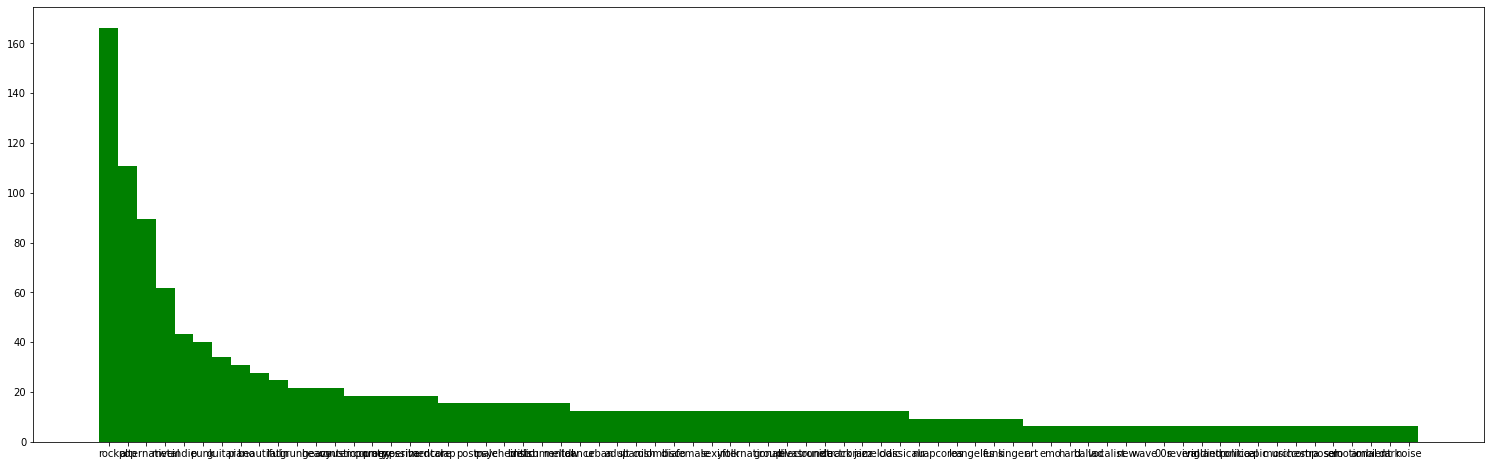

In [242]:
plt.figure(figsize = (26, 8), facecolor = None)
plt.bar(user_tf_if.keys(), user_tf_if.values(), 1, color='g')


In [133]:
def listToString(s):
   
    # initialize an empty string
    str1 = " "
   
    # return string 
    sj = (str1.join(s))
    return sj

In [46]:
print((ml_freq_pairs))

NameError: name 'ml_freq_pairs' is not defined

In [344]:
user_tfidf = getTFIDFuser('8305c896f42308824da7d4386f4b9ee584281412')


first2pairs = {k: user_tfidf[k] for k in list(user_tfidf)[:7]}
user_favourite_tags = []


for genre, weight in first2pairs.items():
    print(genre, ' : ',weight)
    user_favourite_tags.append(genre)

print(user_favourite_tags)

rock  :  166.28984325071113
pop  :  110.85989550047408
alternative  :  89.30380470871523
metal  :  61.58883083359672
indie  :  43.1121815835177
punk  :  40.03274004183786
guitar  :  33.87385695847819
['rock', 'pop', 'alternative', 'metal', 'indie', 'punk', 'guitar']


In [45]:
item_tags_for_finding_songs = []

for items in ml_freq_pairs:
    res = len(set(user_favourite_tags) & set(items))
    uncommon_elements = set(user_favourite_tags) ^ set(items)
    if(res >= 5 ):
        #print(items)
        print(uncommon_elements)
        item_tags_for_finding_songs.append(uncommon_elements)
        print()
    

NameError: name 'ml_freq_pairs' is not defined

In [347]:
songs_cleaned

,artist_id,song_id,artist_terms
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,"[blue-eyed soul, pop rock, blues-rock, beach m..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,"[pop punk, ska punk, breakcore, alternative me..."
7,AR10USD1187B99F3F1,SOHKNRJ12A6701D1F8,"[post-hardcore, screamo, emo, hardcore, punk r..."
11,ARC43071187B990240,SOKEJEJ12A8C13E0D0,"[ccm, religious music, los angeles, christian ..."
12,ARL7K851187B99ACD2,SOMUYGI12AB0188633,"[bachata, merengue, reggaeton, latin pop, span..."
...,...,...,...
9990,ARUUP4L1187B9B72EB,SOILDRV12A8C13EB77,"[no wave, experimental rock, instrumental rock..."
9991,ARI4S0E1187B9B06C0,SOBUUYV12A58A7DA27,"[celtic, future jazz, downtempo, easy listenin..."
9993,ARQ91R31187FB38A88,SOUWMIW12AB0184748,"[bluegrass, classic country, country gospel, c..."
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,"[sympho black metal, black metal, heavy metal,..."


In [44]:
songid_matches = {}

for index, row in songs_cleaned.iterrows():
    
    res = len(set(user_favourite_tags) & set(row['artist_terms']))
    if(res >= 6 ):
        songid_matches[row['song_id']] = res
        #print(res)
    
    #uncommon_elements = set(user_favourite_tags) ^ set(items)
    #print(row)

NameError: name 'user_favourite_tags' is not defined

In [43]:

a = dict(sorted(songid_matches.items(), key=lambda x: x[1],  reverse=True) )
top10recommended = {k: a[k] for k in list(a)[:10]}

top10recommended

NameError: name 'songid_matches' is not defined

In [42]:
for i in top10recommended:
    print(i)

NameError: name 'top10recommended' is not defined

In [40]:
song_name = df.loc[df['song_id'] == 'SOJXVAH12A8C139700']

song_name['song_name']
song_name['artist_terms']

def getSongName(songID):
    song_name = df.loc[df['song_id'] == songID]
    return song_name['song_name']
    

In [41]:
print(getSongName('SOJXVAH12A8C139700'))

36    Barking Dogs (From "Piouhgd")
Name: song_name, dtype: object


In [34]:
df

,artist_id,song_id,song_name,artist_terms
0,ARD7TVE1187B99BFB1,SOMZWCG12A8C13C480,I Didn't Mean To,"[hip hop, underground rap, g funk, alternative..."
1,ARMJAGH1187FB546F3,SOCIWDW12A8C13D406,Soul Deep,"[blue-eyed soul, pop rock, blues-rock, beach m..."
2,ARKRRTF1187B9984DA,SOXVLOJ12AB0189215,Amor De Cabaret,"[salsa, cumbia, tejano, ranchera, latin pop, l..."
3,AR7G5I41187FB4CE6C,SONHOTT12A8C13493C,Something Girls,"[pop rock, new wave, dance rock, rock, new rom..."
4,ARXR32B1187FB57099,SOFSOCN12A8C143F5D,Face the Ashes,"[pop punk, ska punk, breakcore, alternative me..."
...,...,...,...,...
9995,AR4C6V01187FB3BAF4,SOLXXPY12A67ADABA0,The Hanged Man,"[sympho black metal, black metal, heavy metal,..."
9996,AR9JLBU1187B9AAEC4,SOAYONI12A6D4F85C8,The Wonderful World Of The Young,"[ballad, disco, northern soul, chanson, smooth..."
9997,ARS1DCR1187B9A4A56,SOJZLAJ12AB017E8A2,Sentimental Man,"[lovers rock, reggae, roots reggae, dub, orche..."
9998,ARAGMIV11F4C843F78,SORZSCJ12A8C132446,Zydeco In D-Minor,"[zydeco, cajun]"


In [313]:
test_list1 = [5, 6, 4, 10, 7, 1, 19]
test_list2 = [6, 6, 10, 3, 7, 10, 19]
 
# printing original lists
print("The original list 1 is : " + str(test_list1))
print("The original list 2 is : " + str(test_list2))
 
# Identical element summation in lists
# using set() + len()
res = len(set(test_list1) & set(test_list2));
 
# printing result
print("Summation of Identical elements : " + str(res))

The original list 1 is : [5, 6, 4, 10, 7, 1, 19]
The original list 2 is : [6, 6, 10, 3, 7, 10, 19]
Summation of Identical elements : 4
